### Polynomial Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [4]:
x = 6 * np.random.rand(200,1) - 3
y = 0.8 * x**2 + 0.9* x+2 + np.random.randn(200,1)

# y=0.8x^2 + 0.9x + 2

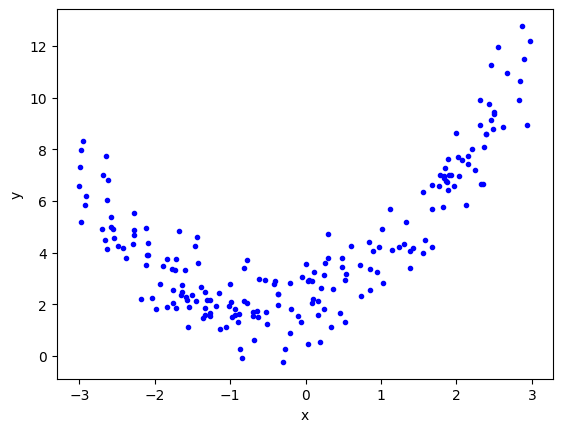

In [5]:
plt.plot(x,y,'b. ')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.2893265154164001

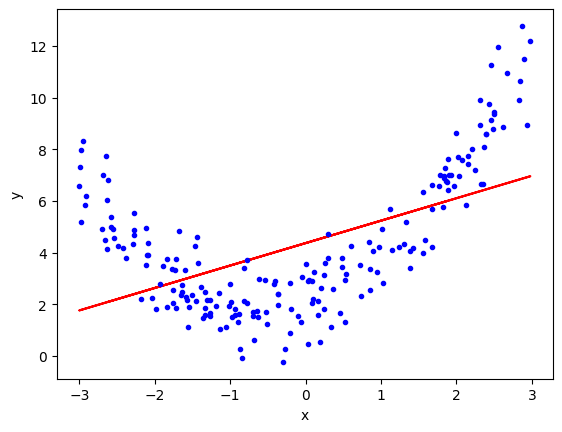

In [10]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,"b. ")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [15]:
# applying polynomial linear regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [16]:
print(x_train[0])
print(x_train_trans[0])

[-2.61515362]
[ 1.         -2.61515362  6.83902847]


In [17]:
# include_bias parameter

In [18]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(x_test_trans)

In [20]:
r2_score(y_test,y_pred)

0.8683389318704394

In [22]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.88676455 0.81089224]]
[2.03620954]


In [23]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

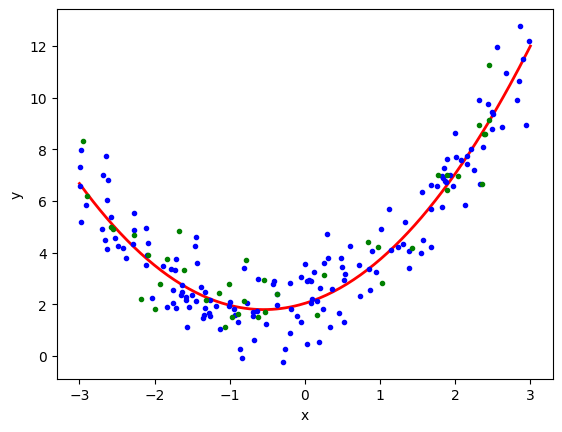

In [25]:
plt.plot(x_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(x_train,y_train,"b. ",label = 'Training points')
plt.plot(x_test,y_test,"g. ",label='Testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [30]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

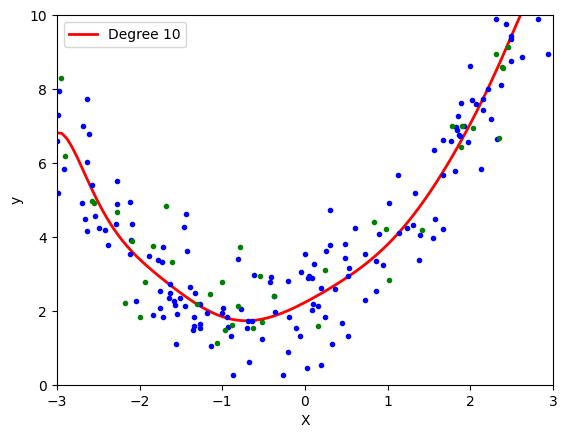

In [33]:
polynomial_regression(10)

In [34]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


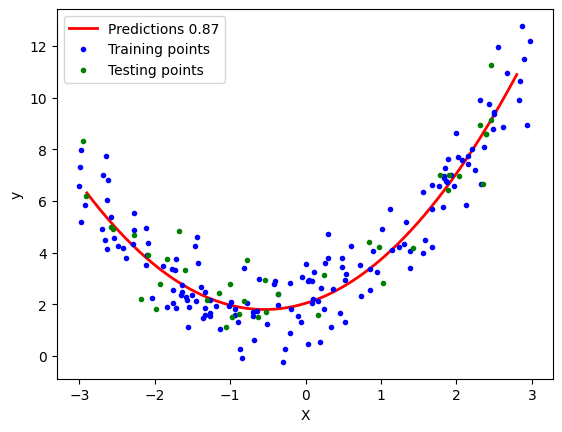

In [35]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(x_train)
X_test_trans = poly.transform(x_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [36]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [37]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [38]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [39]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [40]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [41]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [43]:
if hasattr(poly, "n_input_features_") and hasattr(poly, "n_output_features_") and hasattr(poly, "powers_"):
	print("Input", poly.n_input_features_)
	print("Ouput", poly.n_output_features_)
	print("Powers\n", poly.powers_)
else:
	print("Please fit 'poly' using .fit() or .fit_transform() before accessing these attributes.")

Please fit 'poly' using .fit() or .fit_transform() before accessing these attributes.


In [44]:
X_multi_trans.shape

(100, 496)

In [45]:

lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [46]:

X_test_multi = poly.transform(final)

In [47]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [48]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()